# Data Insights
Targeting high value customers based on customer demographics and attribut

Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders.
Their marketing team is looking 

- **to boost business by analysing their existing customer dataset to determine customer trends and behaviour.**

- **to recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.**

--- 
Analysis activities :

- understanding the data distributions
- feature engineering
- data transformations
- modelling
- results interpretation 
- reporting.


In [2]:
# import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\M\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


> Note:
I already make some preperation using Excel, Ans we're here for continues preperation.

In [3]:
customerAddress_data = pd.read_csv('CustomerAddress.csv')

In [4]:
CustomerDemographic_data= pd.read_csv('CustomerDemographic.csv')

In [5]:
Transactions_data= pd.read_csv('Transactions.csv')

In [6]:
Transactions_data.dtypes

transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date            object
online_order                object
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost              float64
product_first_sold_date    float64
dtype: object

- - - 

In [7]:
merged_Data = pd.merge(CustomerDemographic_data , customerAddress_data,  on='customer_id')

In [8]:
df = pd.merge(Transactions_data , merged_Data ,on='customer_id' )

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513 entries, 0 to 19512
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19513 non-null  int64  
 1   product_id                           19513 non-null  int64  
 2   customer_id                          19513 non-null  int64  
 3   transaction_date                     19513 non-null  object 
 4   online_order                         19162 non-null  object 
 5   order_status                         19513 non-null  object 
 6   brand                                19327 non-null  object 
 7   product_line                         19327 non-null  object 
 8   product_class                        19327 non-null  object 
 9   product_size                         19327 non-null  object 
 10  list_price                           19513 non-null  float64
 11  standard_cost               

In [10]:
df.shape

(19513, 32)

In [11]:
# Summarize numercial variables
df.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,Age,tenure,postcode,property_valuation
count,19513.000000,19513.000000,19513.000000,19513.000000,19327.000000,19327.000000,19513.000000,19513.000000,19513.000000,19513.000000,19513.000000
mean,9993.896479,45.354328,1739.902424,1106.277051,555.749864,38202.130025,48.909957,45.553785,10.677651,2987.327371,7.516732
std,5770.884174,30.737403,1009.622824,582.921922,405.716005,2873.717860,28.653549,12.603361,5.672409,852.242049,2.826513
min,1.000000,0.000000,1.000000,12.010000,7.210000,33259.000000,0.000000,21.000000,1.000000,2000.000000,1.000000
25%,5004.000000,18.000000,860.000000,575.270000,215.140000,35667.000000,24.000000,36.000000,6.000000,2200.000000,6.000000
50%,9987.000000,44.000000,1736.000000,1163.890000,507.580000,38216.000000,48.000000,46.000000,11.000000,2767.000000,8.000000
75%,14985.000000,72.000000,2613.000000,1635.300000,795.100000,40672.000000,73.000000,55.000000,15.000000,3752.000000,10.000000
max,20000.000000,100.000000,3500.000000,2091.470000,1759.850000,42710.000000,99.000000,91.000000,22.000000,4883.000000,12.000000


#### Data preperation
This contains the following:

- Missing value handling
- Inconsistent data handling
- Duplicate data handling

In [12]:
# check for null values 
df.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                            351
order_status                              0
brand                                   186
product_line                            186
product_class                           186
product_size                            186
list_price                                0
standard_cost                           186
product_first_sold_date                 186
first_name                                0
last_name                               626
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                       0
Age                                       0
Age_Bin                                   0
Age_Group                                 0
job_title                              2340
job_industry_category           

In [13]:
df['tenure'].fillna(df['tenure'].mean(), inplace= True)

In [14]:
# The ffill() method replaces the NULL values with the value from the previous row (or previous column, if the axis parameter is set to 'columns' )
df['last_name'].fillna(method='ffill', inplace = True)

In [15]:
df['DOB'].fillna(method='ffill', inplace = True)

In [16]:
df['standard_cost'].fillna(df['standard_cost'].mean(), inplace = True)

In [17]:
df['brand'].fillna(method='ffill', inplace = True)

In [18]:
df['product_line'].fillna(method='ffill', inplace = True)

In [19]:
df['online_order'].fillna(method='ffill', inplace = True)

In [20]:
df['product_class'].fillna(method='ffill', inplace = True)

In [21]:
df['product_first_sold_date'].fillna(method='ffill', inplace = True)

In [22]:
df['product_size'].fillna(method='ffill', inplace = True)

In [23]:
df['job_title'].fillna(method='ffill', inplace = True)

In [24]:
df['job_industry_category'].fillna(method='ffill', inplace = True)

In [25]:
# Check for duplicate value
sum(df.duplicated())

0

In [26]:
data = pd.DataFrame(df)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513 entries, 0 to 19512
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19513 non-null  int64  
 1   product_id                           19513 non-null  int64  
 2   customer_id                          19513 non-null  int64  
 3   transaction_date                     19513 non-null  object 
 4   online_order                         19513 non-null  bool   
 5   order_status                         19513 non-null  object 
 6   brand                                19513 non-null  object 
 7   product_line                         19513 non-null  object 
 8   product_class                        19513 non-null  object 
 9   product_size                         19513 non-null  object 
 10  list_price                           19513 non-null  float64
 11  standard_cost               

In [28]:
# save it to csv, that I can make visualization using Tableau
data.to_csv('Dataset.csv', index=False)

In [29]:
NewCustomerList= pd.read_csv('NewCustomerList.csv')

In [30]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Id                                   983 non-null    int64  
 1   first_name                           983 non-null    object 
 2   last_name                            954 non-null    object 
 3   gender                               983 non-null    object 
 4   past_3_years_bike_related_purchases  983 non-null    int64  
 5   DOB                                  983 non-null    object 
 6   Age                                  983 non-null    int64  
 7   age_group                            983 non-null    object 
 8   job_title                            878 non-null    object 
 9   job_industry_category                818 non-null    object 
 10  wealth_segment                       983 non-null    object 
 11  deceased_indicator              

In [116]:
NewCustomerList['job_industry_category'].fillna(method='ffill', inplace = True)

## Visualizing the count of customers by gender

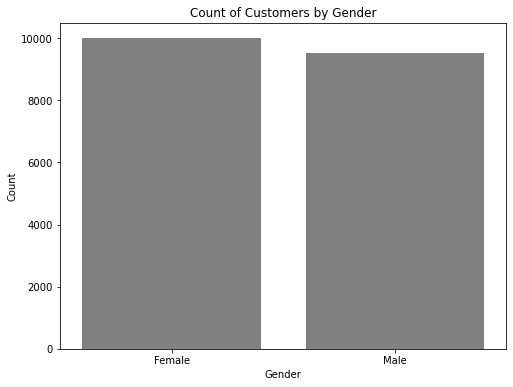

In [31]:
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, color = 'grey')
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

> We can see the sex of customers are almost equally, they both like to puchase a bike with the same level.

## Visualizing the Number of Customers by Wealth Segment and Car Ownership

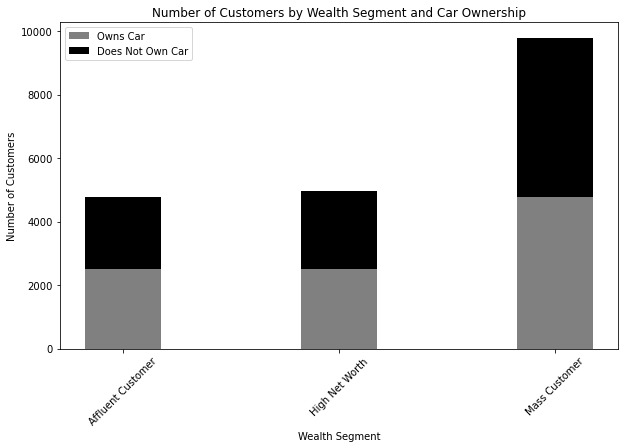

In [32]:
grouped_data = data.groupby(['wealth_segment', 'owns_car']).size().unstack(fill_value=0)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(grouped_data))

bars1 = ax.bar(index, grouped_data['Yes'], bar_width, label='Owns Car', color='grey')
bars2 = ax.bar(index, grouped_data['No'], bar_width, label='Does Not Own Car', color='black', bottom=grouped_data['Yes'])

ax.set_xlabel('Wealth Segment')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Wealth Segment and Car Ownership')
ax.set_xticks(index)
ax.set_xticklabels(grouped_data.index)
plt.xticks(rotation=45)
ax.legend()

plt.show()

In [33]:
grouped_data

owns_car,No,Yes
wealth_segment,,
Affluent Customer,2255,2510
High Net Worth,2460,2505
Mass Customer,5012,4771


> The mass customer type are a lot purchasing a bikes, whatever if they own a car or not.

## Does the ownership of the cars affecting to customers?

<AxesSubplot:xlabel='order_status', ylabel='customer_id'>

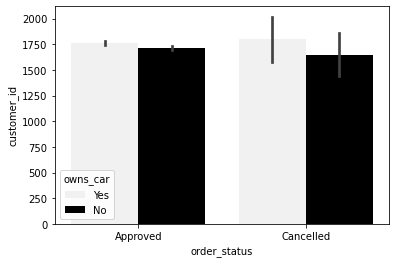

In [34]:
# Old Customer
sns.barplot(x='order_status',y='customer_id',data=data, hue='owns_car', color = 'black')

> We can notice, that the car ownership by customers affecting the purchases, since we can see at the chart *cancelled online oreders* by people who owns a car.

## What the most preferred brand to customers?

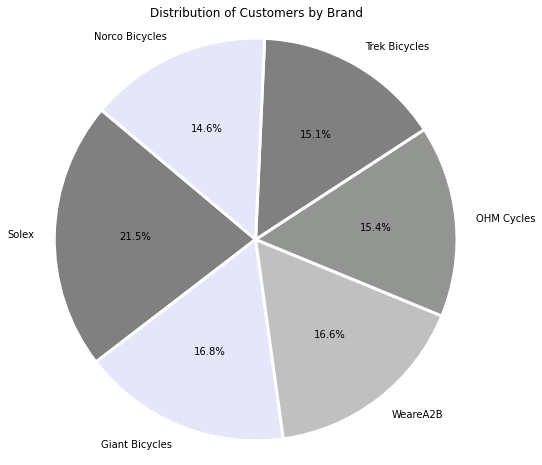

In [35]:
brand_customers = data['brand'].value_counts()

colors = ['#808080', '#E6E6FA', '#C0C0C0', '#929591']
plt.figure(figsize=(8, 8))
plt.pie(brand_customers, labels=brand_customers.index, autopct='%1.1f%%', startangle=140,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.title('Distribution of Customers by Brand')
plt.axis('equal')
plt.show()

> I noticed that all brands have the same popularity, with a small number difference of Solex.

## What is the preferred product class?

<AxesSubplot:xlabel='product_class', ylabel='customer_id'>

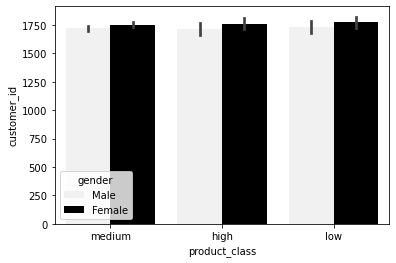

In [360]:
sns.barplot(x='product_class',y='customer_id',data=data, hue='gender', color = 'black')

> They are almost have the same purchases

## What is the location distribution by wealth segments?

<AxesSubplot:ylabel='state'>

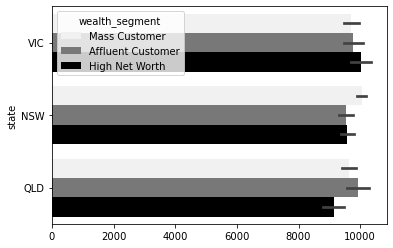

In [368]:
# old customer
sns.barplot(x=np.arange(0,19513),y='state',data=data, hue='wealth_segment', color = 'Black')

## Job Industry Category Vs. Total Purchases for New Customer

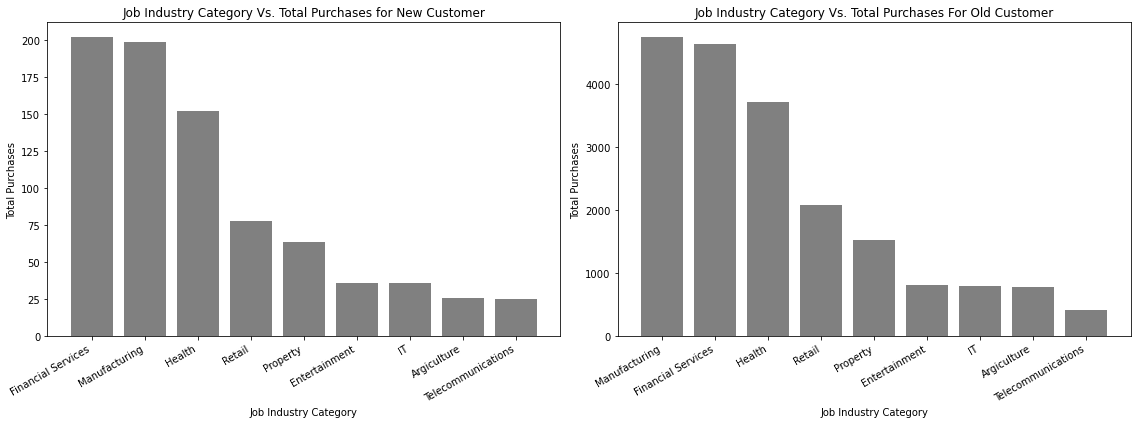

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
industry = NewCustomerList['job_industry_category'].value_counts()
axs[0].bar(industry.index, industry.values,color='Grey')
axs[0].set_title('Job Industry Category Vs. Total Purchases for New Customer')
axs[0].set_xlabel('Job Industry Category')
axs[0].set_ylabel('Total Purchases')

industry0 = data['job_industry_category'].value_counts()
axs[1].bar(industry0.index, industry0.values,color='Grey')
axs[1].set_title('Job Industry Category Vs. Total Purchases For Old Customer')
axs[1].set_xlabel('Job Industry Category')
axs[1].set_ylabel('Total Purchases')
plt.setp(axs[0].get_xticklabels() + axs[1].get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()

## Location distribution by wealth segments 

<AxesSubplot:ylabel='state'>

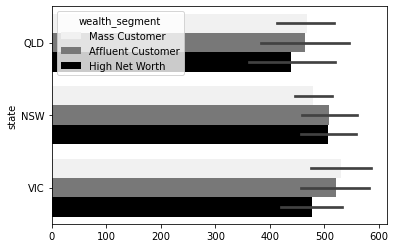

In [45]:
# New customer
sns.barplot(y='state',x=np.arange(0,983),data=NewCustomerList, hue='wealth_segment', color = 'black')

> For the New customers, we can see the wealth segments are high in New South Wales and almost in Victoria.

## Distribution of New Customer Vs. Old Customer by Gender

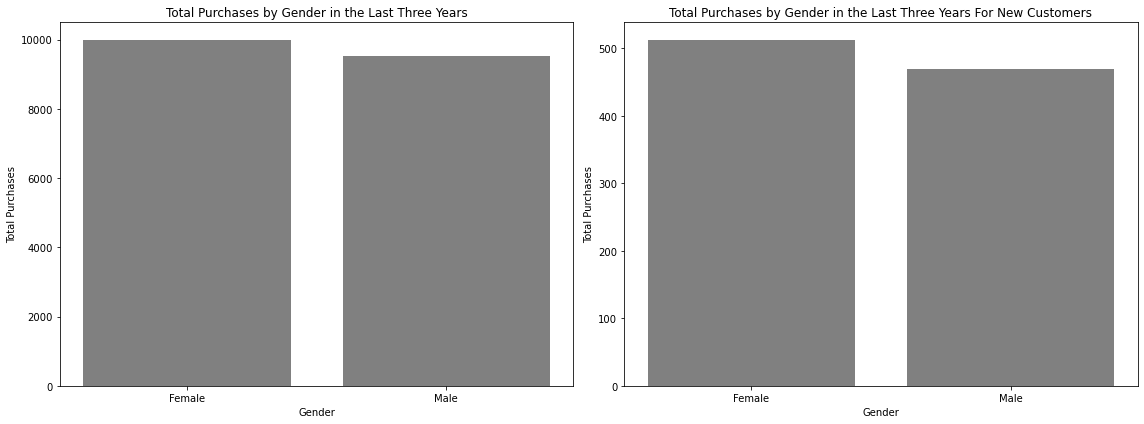

In [92]:
# New Customer Vs. Old Customer by Gender

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
gender = data['gender'].value_counts()
# Plot the Total Purchases by Gender in the Last Three Years
axs[0].bar(gender.index, gender.values,color='Grey')
axs[0].set_title('Total Purchases by Gender in the Last Three Years')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Total Purchases')

gender_list = NewCustomerList['gender'].value_counts()
axs[1].bar(gender_list.index, gender_list.values,color='Grey')
axs[1].set_title('Total Purchases by Gender in the Last Three Years For New Customers')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Total Purchases')

plt.tight_layout()
plt.show()

In [93]:
gender

gender
Female    9997
Male      9516
Name: count, dtype: int64

> We can see, the number of female are high in both customers, new and old.

## New Customer Vs. Old Customer Age Group

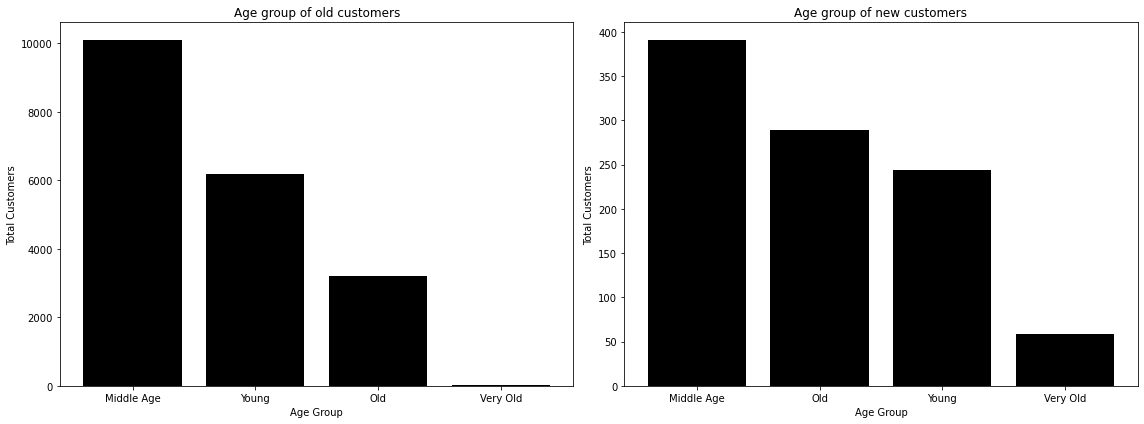

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
age = data['Age_Group'].value_counts()
axs[0].bar(age.index, age.values, color= 'black')
axs[0].set_title('Age group of old customers')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Total Customers')

age2 = NewCustomerList['age_group'].value_counts()
axs[1].bar(age2.index, age2.values, color= 'black')
axs[1].set_title('Age group of new customers')
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Total Customers')
plt.tight_layout()
plt.show()

> In the target customer, we noticed that all age group have purchases, and the must purchases are purchased by Middle Age customers. 

# Location distribution By New Customers ?

<BarContainer object of 3 artists>

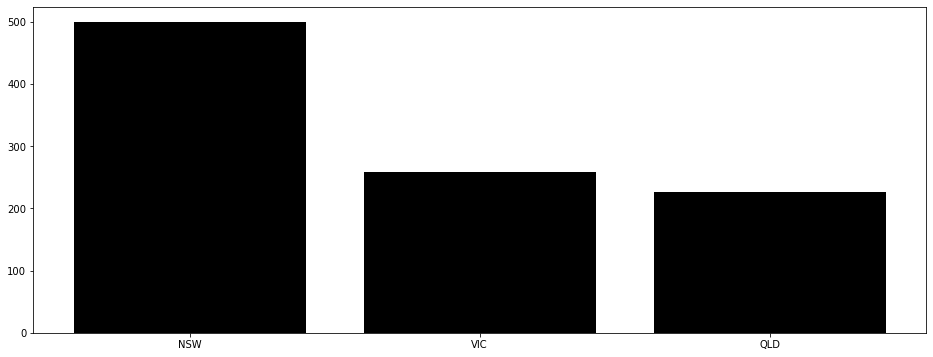

In [49]:
# Location distribution By New Customers ?
fig = plt.subplots(1, figsize=(16, 6))
state = NewCustomerList['state'].value_counts()
plt.bar(state.index, state.values,color='Black')

> In this chart, We noticed a high bikes purchases at New South Wales.

In [118]:
cols = NewCustomerList[['first_name', 'last_name','past_3_years_bike_related_purchases', 'Age', 'age_group','job_industry_category', 'wealth_segment','state','owns_car']]

In [128]:
Interpretation = cols.loc[(cols.past_3_years_bike_related_purchases >= 90 )]
Interpretation.head(20)

,first_name,last_name,past_3_years_bike_related_purchases,Age,age_group,job_industry_category,wealth_segment,state,owns_car
10,Rockwell,Matson,94,28,Young,Retail,High Net Worth,QLD,No
53,Odessa,Mc Andrew,97,41,Middle Age,Property,Mass Customer,NSW,No
74,Hasheem,Groucock,98,48,Middle Age,Manufacturing,High Net Worth,NSW,Yes
89,Ludovico,Juster,93,31,Young,Health,Affluent Customer,NSW,No
92,Levy,Abramamov,94,70,Old,Retail,Affluent Customer,QLD,Yes
94,Jehu,Prestedge,91,23,Young,Manufacturing,High Net Worth,NSW,Yes
107,Aridatha,Sephton,95,61,Old,Retail,Mass Customer,NSW,No
109,Franciska,Stigell,95,54,Middle Age,Health,Mass Customer,VIC,Yes
135,Malorie,Votier,90,33,Young,Manufacturing,Affluent Customer,QLD,No
139,My,Chaston,92,57,Middle Age,Manufacturing,Affluent Customer,VIC,Yes


In [95]:
NewCustomerList.columns

Index(['Id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'age_group',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Rank', 'Value'],
      dtype='object')